In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

In [2]:
table = pd.read_csv('gender_classification.csv')

In [3]:
table.columns

Index(['LongHair', 'ForeheadWidth', 'ForeheadHeight', 'NoseWide', 'NoseLong',
       'LipsThin', 'DistanceNoseToLipLong', 'Gender'],
      dtype='object')

In [4]:
table.size

40008

In [5]:
table.head()

,LongHair,ForeheadWidth,ForeheadHeight,NoseWide,NoseLong,LipsThin,DistanceNoseToLipLong,Gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [6]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LongHair               5001 non-null   int64  
 1   ForeheadWidth          5001 non-null   float64
 2   ForeheadHeight         5001 non-null   float64
 3   NoseWide               5001 non-null   int64  
 4   NoseLong               5001 non-null   int64  
 5   LipsThin               5001 non-null   int64  
 6   DistanceNoseToLipLong  5001 non-null   int64  
 7   Gender                 5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [7]:
table['Gender'].value_counts()

1    2501
0    2500
Name: Gender, dtype: int64

In [8]:
table.isnull().sum()

LongHair                 0
ForeheadWidth            0
ForeheadHeight           0
NoseWide                 0
NoseLong                 0
LipsThin                 0
DistanceNoseToLipLong    0
Gender                   0
dtype: int64

In [9]:
table.describe()

,LongHair,ForeheadWidth,ForeheadHeight,NoseWide,NoseLong,LipsThin,DistanceNoseToLipLong,Gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.50010
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


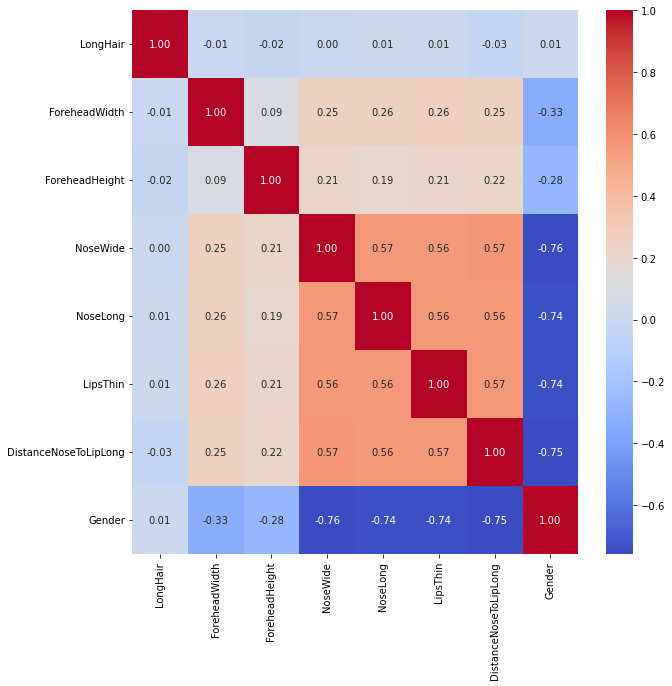

In [10]:
corr = table.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = ".2f")
plt.show()

In [11]:
table.columns

Index(['LongHair', 'ForeheadWidth', 'ForeheadHeight', 'NoseWide', 'NoseLong',
       'LipsThin', 'DistanceNoseToLipLong', 'Gender'],
      dtype='object')

In [12]:
features_plot = table[['LongHair', 'ForeheadWidth', 'ForeheadHeight', 'NoseWide', 'LipsThin', 'DistanceNoseToLipLong', 'Gender']]

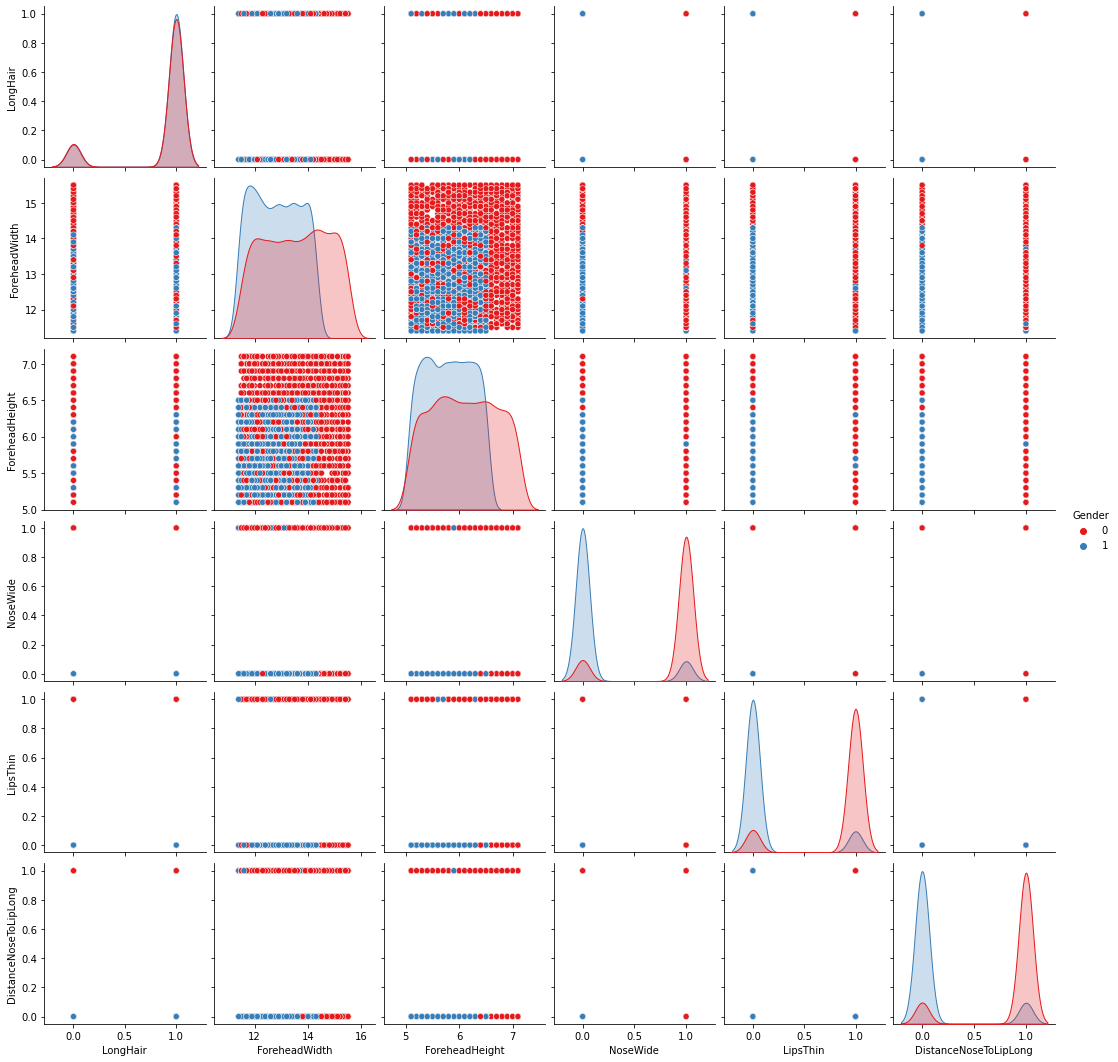

In [13]:
sns.pairplot(features_plot, hue = "Gender", palette = 'Set1')

In [14]:
X = table.drop(['Gender'], axis = 1)
Y = table['Gender']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

# k-nearest neighbors

In [16]:
error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(scaled_X_train, Y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != Y_test))

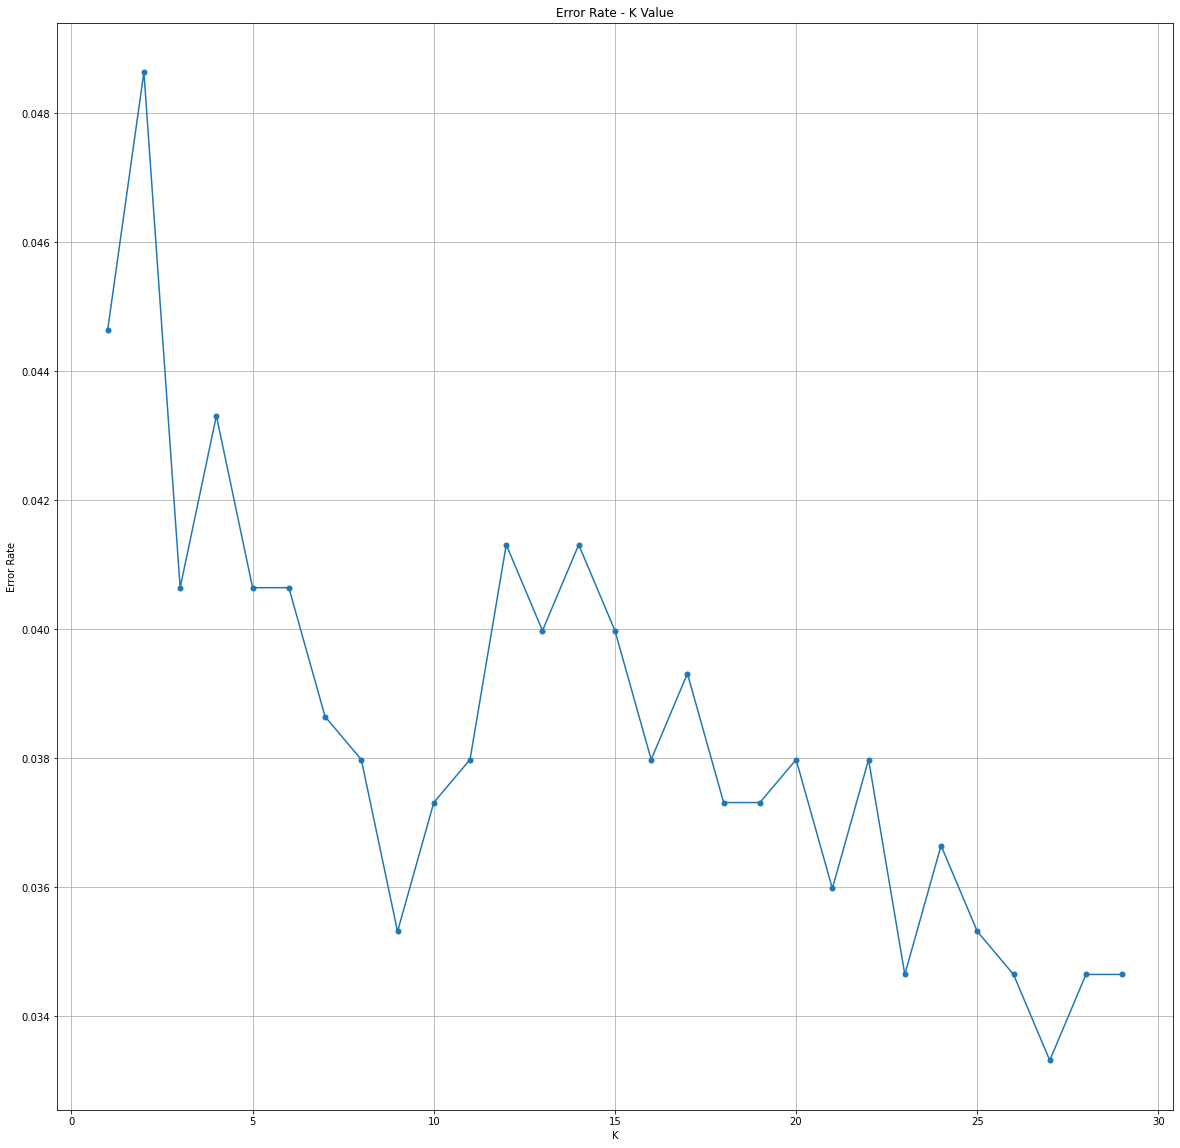

In [17]:
plt.figure(figsize = (20, 20))
plt.plot(range(1, 30), error_rate, marker='.', markersize = 10)
plt.title('Error Rate - K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [18]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(scaled_X_train, Y_train)
pred = knn.predict(scaled_X_test)

In [19]:
print(classification_report(Y_test, pred))
print(confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       727
           1       0.96      0.95      0.96       774

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501

[[696  31]
 [ 36 738]]


In [20]:
print(accuracy_score(Y_test, pred))

0.955363091272485


# Decision Tree

In [21]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X, Y)
pred = tree.predict(X_test)

In [22]:
print(accuracy_score(Y_test, pred))

0.9640239840106596


In [23]:
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       727
           1       0.96      0.97      0.97       774

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501

[[693  34]
 [ 20 754]]


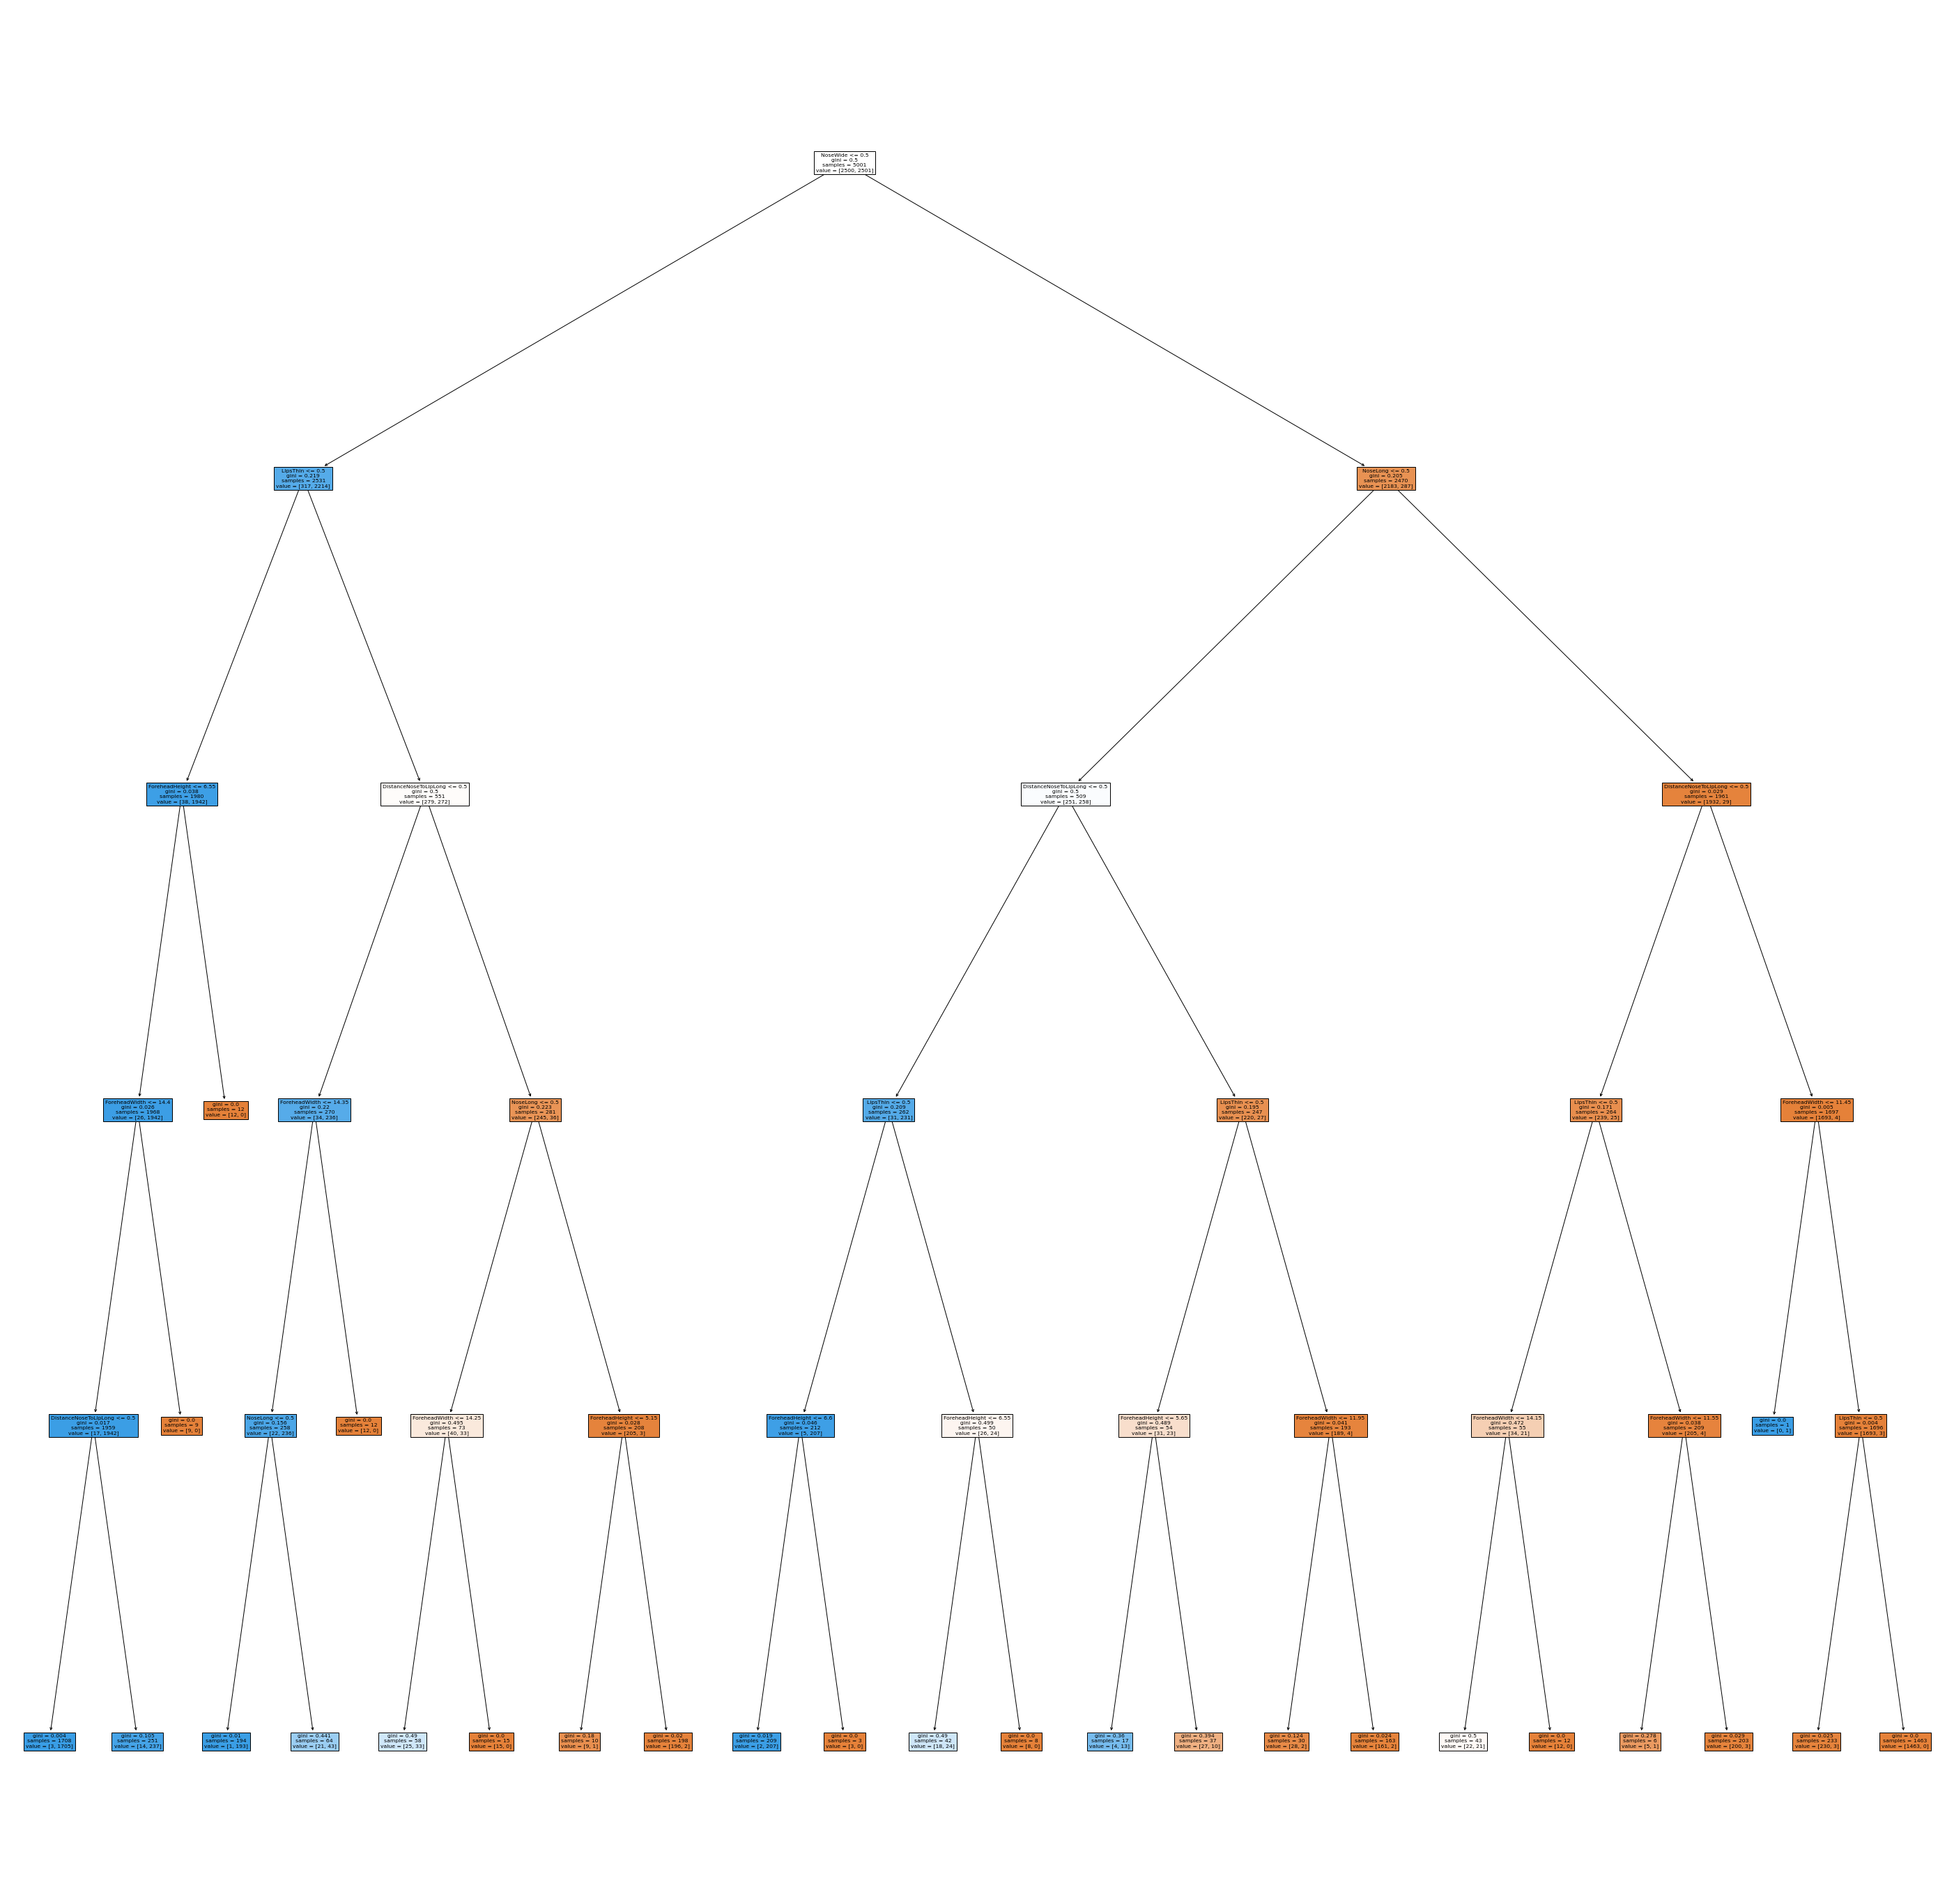

In [24]:
plt.figure(figsize = (50, 50))
plot_tree(tree, filled = True, feature_names = ['LongHair', 'ForeheadWidth', 'ForeheadHeight', 'NoseWide', 'NoseLong',
       'LipsThin', 'DistanceNoseToLipLong'] )
plt.show()

# Support-vector machine

In [25]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
gs = GridSearchCV(SVC(), param_grid)
k = gs.fit(X_train, Y_train)

In [26]:
print("Accuracy=", k.best_score_)
print("С =", k.best_params_['C'], "Gamma =", k.best_params_['gamma'], "Kernel =", k.best_params_['kernel'])

Accuracy= 0.9762857142857143
С = 1000 Gamma = 0.01 Kernel = rbf


In [27]:
model = SVC(kernel = k.best_params_['kernel'], C = k.best_params_['C'], gamma = k.best_params_['gamma'])
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [28]:
print(metrics.accuracy_score(pred, Y_test))

0.9646902065289806


In [29]:
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       727
           1       0.96      0.97      0.97       774

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501

[[696  31]
 [ 22 752]]


# Random Forest

In [30]:
grid_params = {'max_depth': np.arange(1, 10), 'n_estimators': [150, 200, 250, 300]}
gs = GridSearchCV(RandomForestClassifier(), grid_params)
k = gs.fit(X_train, Y_train)

In [31]:
print("Accuracy =", k.best_score_)
print("Max Depth =", k.best_params_['max_depth'], "N estimators =", k.best_params_['n_estimators'])

Accuracy = 0.978857142857143
Max Depth = 5 N estimators = 200


In [32]:
model = RandomForestClassifier(max_depth = k.best_params_['max_depth'], n_estimators = k.best_params_['n_estimators'])
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [33]:
print(metrics.accuracy_score(pred, Y_test))

0.9673550966022652


In [34]:
print(classification_report(Y_test, pred))
print(confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       727
           1       0.97      0.97      0.97       774

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

[[702  25]
 [ 24 750]]


# AdaBoost

In [35]:
grid_params = {'learning_rate':np.arange(0.2, 1, 0.2), 'n_estimators': np.arange(50, 200, 50)}
gs = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5)), grid_params, verbose = 5, n_jobs = -1, cv = 5)
k = gs.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [36]:
print("Accuracy =", k.best_score_)
print("Learning rate =", k.best_params_['learning_rate'], "N estimators =", k.best_params_['n_estimators'])

Accuracy = 0.9665714285714285
Learning rate = 0.2 N estimators = 50


In [37]:
model = k.best_estimator_
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [38]:
print(metrics.accuracy_score(pred, Y_test))

0.9593604263824117


In [39]:
print(classification_report(Y_test, pred))
print(confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       727
           1       0.96      0.96      0.96       774

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501

[[695  32]
 [ 29 745]]
